In [2]:
import pickle
import os

import pandas as pd
import numpy as np
from astropy.table import Table
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt

import sklearn
from sklearn.neighbors import KDTree

In [4]:
data_dir = 'data'
# FLOAT_PREC = 3

In [5]:
with open(f'{data_dir}/features_sdssdr16+psdr2+all_deacls8tr_QSO+GALAXY_20201212133711.pkl', 'rb') as f:
    features_list = pickle.load(f)

In [4]:
dfs = []
for i in range(32):
    num = str(i).zfill(5)
    feas = pd.read_pickle(
        f'{data_dir}/22_DR16Q_v4-wo_20_train/part-{num}.features.gz_pkl',
        compression='gzip'
    )[['RA', 'DEC', 'Z'] + features_list]
    preds = pd.read_pickle(
        f'{data_dir}/22_DR16Q_v4-wo_20_train/part-{num}.predictions.x1a.gz_pkl',
        compression='gzip'
    )[['zoo_x1a35_z_max', 'zoo_x1a35_z_maxConf']]
    df = feas.merge(preds, how='right', left_index=True, right_index=True)
    dfs.append(df)
DR16Q_22_v4 = pd.concat(dfs, axis=0)
DR16Q_22_v4['SOURCE'] = ['DR16Q_22_v4'] * DR16Q_22_v4.shape[0]
DR16Q_22_v4

,RA,DEC,Z,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,sdssdr16_i_cmodel,...,decals8tr_z,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE
1,0.001415,31.057048,2.035491,22.074640,21.787479,21.562507,21.360414,20.933499,21.817585,21.363539,...,21.058581,0.305267,0.779212,0.473944,-0.023963,-0.116084,-0.320602,2.028873,0.274436,DR16Q_22_v4
2,0.001535,7.064129,1.574227,22.498194,22.103252,21.854685,21.638759,21.964469,21.761538,21.574824,...,21.778303,0.151087,0.315885,0.164798,-0.043265,-0.070024,-0.605396,1.613,0.561226,DR16Q_22_v4
3,0.001526,27.732283,1.770552,22.330387,21.903107,21.751831,21.664443,22.048195,21.924103,21.556177,...,21.972976,0.142241,0.327176,0.184935,-0.458877,-0.524986,-2.353988,1.682694,0.613794,DR16Q_22_v4
4,0.001914,9.385637,2.024146,18.765830,18.661867,18.499508,18.335921,18.158410,18.774551,18.369465,...,18.119927,0.230702,0.535612,0.304910,-0.049329,0.083550,0.047153,NaN,NaN,DR16Q_22_v4
5,0.001978,-0.451088,0.250000,21.672738,21.193839,20.508787,20.153170,19.878580,21.432634,19.721854,...,19.557413,0.818934,1.409359,0.590424,0.096018,0.009057,-0.250328,0.3508,0.702891,DR16Q_22_v4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,359.997573,-9.826069,2.439000,22.488502,21.007420,21.059175,21.065099,20.417605,19.705819,21.006593,...,20.867049,-0.140864,0.479309,0.620173,-0.419798,-0.469388,-0.363081,2.522,0.733557,DR16Q_22_v4
1503,359.997675,0.144870,1.356595,20.452710,20.535363,20.305790,20.287443,20.298002,20.508662,20.289982,...,20.579187,0.388294,0.286701,-0.101593,-0.366830,-0.191817,-0.268319,1.175745,0.7415,DR16Q_22_v4
1504,359.997704,10.564075,1.284287,20.054219,19.806360,19.387776,19.168335,19.006462,19.925669,19.138338,...,18.921942,0.406352,0.644444,0.238092,0.239241,0.162244,0.082854,1.451017,0.844344,DR16Q_22_v4
1505,359.998520,-0.655884,1.355954,22.055338,22.506995,21.409914,21.748930,21.661750,21.947964,21.504402,...,21.326957,0.590700,0.871405,0.280705,0.235645,0.314801,-0.326978,1.078204,0.492389,DR16Q_22_v4


In [5]:
from copy import copy

In [6]:
dfs = []

feas = pd.read_pickle(
    f'{data_dir}/20_2-fold-cv/cv2_0/part-00000.features.gz_pkl',
    compression='gzip'
)[['ra', 'dec', 'zspec'] + features_list]
preds = pd.read_pickle(
    f'{data_dir}/20_2-fold-cv/cv2_0/part-00000.predictions.x1cv2_0.gz_pkl',
    compression='gzip'
)[['zoo_x1cv2_035_z_max', 'zoo_x1cv2_035_z_maxConf']]
df = feas.merge(preds, how='right', left_index=True, right_index=True)
df['SOURCE'] = ['train_20'] * df.shape[0]
df.columns = copy(DR16Q_22_v4.columns)
dfs.append(df)

feas = pd.read_pickle(
    f'{data_dir}/20_2-fold-cv/cv2_1/part-00000.features.gz_pkl',
    compression='gzip'
)[['ra', 'dec', 'zspec'] + features_list]
preds = pd.read_pickle(
    f'{data_dir}/20_2-fold-cv/cv2_1/part-00000.predictions.x1cv2_1.gz_pkl',
    compression='gzip'
)[['zoo_x1cv2_135_z_max', 'zoo_x1cv2_135_z_maxConf']]
df = feas.merge(preds, how='right', left_index=True, right_index=True)
df['SOURCE'] = ['train_20'] * df.shape[0]
df.columns = copy(DR16Q_22_v4.columns)
dfs.append(df)

train_20 = pd.concat(dfs, axis=0)
train_20

,RA,DEC,Z,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,sdssdr16_i_cmodel,...,decals8tr_z,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE
0,182.850396,48.979910,0.046132,21.455454,20.397562,20.176270,20.017108,19.522008,18.280063,16.635444,...,16.505153,0.436565,0.626472,0.189907,-0.043534,0.129278,0.245783,0.037764,1.0,train_20
1,192.616971,27.434890,0.021385,18.601305,16.781441,16.180791,15.854903,15.484326,16.269734,13.308142,...,13.064438,0.793807,1.398152,0.604346,-0.017877,0.023927,-0.000922,0.02685,0.0,train_20
5,155.117013,37.951053,0.046178,19.744036,18.145850,17.332207,17.088476,16.753079,19.015308,16.324593,...,16.004075,0.814706,1.365940,0.551234,0.031913,0.086707,0.033045,0.047802,0.996445,train_20
6,185.510020,10.620819,0.025434,20.341056,19.010524,18.585923,17.817668,17.890224,17.053515,14.998069,...,13.875463,0.610495,1.051978,0.441483,0.870102,0.983178,0.919084,0.03067,0.948241,train_20
11,159.861973,5.562852,0.028537,19.755114,18.861927,18.829504,18.670477,18.471404,18.614930,17.206909,...,17.288355,0.265851,0.446497,0.180646,-0.086867,-0.088089,-0.168231,0.037071,1.0,train_20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586163,338.229771,29.508976,6.666000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.181786,0.143299,4.247833,4.104534,NaN,NaN,NaN,NaN,NaN,train_20
586166,127.383208,41.294556,6.768000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.361686,-0.619201,4.365589,4.984790,NaN,NaN,NaN,NaN,NaN,train_20
586167,166.089958,21.574667,6.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.149281,-0.615328,4.882084,5.497412,NaN,NaN,NaN,NaN,NaN,train_20
586170,62.869291,-9.130500,6.810000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.688208,-0.936220,6.112917,7.049137,NaN,NaN,NaN,NaN,NaN,train_20


In [7]:
dfs = []
for i in tqdm(range(24)):
    num = str(i).zfill(5)
    feas = pd.read_pickle(
        f'{data_dir}/Superset/part-{num}.features.gz_pkl',
        compression='gzip'
    )#[['RA', 'DEC'] + features_list]
    preds = pd.read_pickle(
        f'{data_dir}/Superset/part-{num}.predictions.x1.gz_pkl',
        compression='gzip'
    )[['zoo_x135_z_max', 'zoo_x135_z_maxConf']]
    df = feas.merge(preds, how='right', left_index=True, right_index=True)
    dfs.append(df)
superset = pd.concat(dfs, axis=0)
superset['SOURCE'] = ['superset'] * superset.shape[0]

100%|██████████| 24/24 [03:59<00:00,  9.98s/it]


In [8]:
superset = superset[['RA', 'DEC', 'ls_ra', 'ls_dec'] + features_list + ['zoo_x135_z_max', 'zoo_x135_z_maxConf'] + ['SOURCE']]

In [9]:
def angular_dist(ra_01, ra_02, dec_01, dec_02):
    ra_01 = ra_01 * np.pi / 180
    ra_02 = ra_02 * np.pi / 180
    dec_01 = dec_01 * np.pi / 180
    dec_02 = dec_02 * np.pi / 180
    return np.arccos(np.minimum(
        np.sin(dec_01) * np.sin(dec_02) +
        np.cos(dec_01) * np.cos(dec_02) * np.cos(ra_01 - ra_02),
        1
    )) * 180 / (np.pi)

In [11]:
superset['dist'] = angular_dist(superset['RA'], superset['ls_ra'], superset['DEC'], superset['ls_dec'])

In [12]:
superset

,RA,DEC,ls_ra,ls_dec,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,...,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x135_z_max,zoo_x135_z_maxConf,SOURCE,dist
2,0.000187,6.767321,0.000212,6.767280,21.590658,20.470472,19.878349,19.612843,19.470517,21.634318,...,0.617608,0.866237,0.248629,0.055773,0.082542,-0.042110,1.970161,0.168857,superset,0.000048
5,0.000187,6.767321,359.999655,6.769981,24.053652,22.240223,20.813167,19.805371,19.258664,22.847764,...,1.395554,2.736876,1.341322,0.233397,0.184838,0.007895,2.48,0.283212,superset,0.002712
9,0.000187,6.767321,0.002264,6.760128,24.039265,21.480227,20.133193,18.845617,18.176253,18.073247,...,1.425142,3.216669,1.791527,0.129296,0.196417,0.024116,2.113919,0.239036,superset,0.007483
11,0.000215,27.469903,359.998858,27.468378,22.973053,23.187552,22.804901,22.573780,21.997900,22.464988,...,1.030523,1.352979,0.322456,-0.484407,0.418398,0.200137,0.486855,0.231453,superset,0.001943
12,0.000215,27.469903,0.000215,27.469899,21.747994,20.858652,20.552663,20.526209,20.466532,21.735348,...,0.331536,0.410934,0.079398,-0.028593,0.011901,0.063489,0.175307,0.076244,superset,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261610,359.999190,27.772593,359.994932,27.768615,24.122321,24.603369,23.699893,22.400063,22.347781,24.066899,...,0.824688,2.141929,1.317241,0.469467,0.478600,-1.460962,2.403521,0.246139,superset,0.005479
261613,359.999190,27.772593,359.999855,27.775342,21.945505,20.565568,19.810520,19.443499,19.074663,20.551417,...,0.869761,1.530694,0.660933,0.009889,-0.026999,-0.128156,0.130469,0.741003,superset,0.002811
261618,359.999190,27.772593,359.993380,27.773434,23.274293,23.610978,23.143130,23.003916,22.885532,22.846775,...,0.906282,1.314557,0.408275,-0.907781,0.142787,-2.925830,2.6638,0.170417,superset,0.005209
261619,359.999190,27.772593,359.992586,27.775682,24.836545,24.204140,23.210190,21.379112,20.454419,21.814600,...,1.713329,4.050336,2.337006,-0.371019,0.388172,-0.037548,2.238,0.181331,superset,0.006609


In [13]:
t_min = superset.groupby(['RA', 'DEC']).min()['dist']

In [14]:
t_count = superset.groupby(['RA', 'DEC']).count()

In [15]:
sum(t_count['dist'])

2445355

In [16]:
min_dists = []
for i, c in enumerate(t_count['dist']):
    min_dists += (c * [t_min.values[i]])

In [17]:
superset['min_dist'] = min_dists

In [18]:
superset = superset[superset['dist'] == superset['min_dist']]
superset

,RA,DEC,ls_ra,ls_dec,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,...,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x135_z_max,zoo_x135_z_maxConf,SOURCE,dist,min_dist
2,0.000187,6.767321,0.000212,6.767280,21.590658,20.470472,19.878349,19.612843,19.470517,21.634318,...,0.866237,0.248629,0.055773,0.082542,-0.042110,1.970161,0.168857,superset,0.000048,0.000048
12,0.000215,27.469903,0.000215,27.469899,21.747994,20.858652,20.552663,20.526209,20.466532,21.735348,...,0.410934,0.079398,-0.028593,0.011901,0.063489,0.175307,0.076244,superset,0.000005,0.000005
20,0.000279,-2.237564,0.000338,-2.237582,24.945710,22.802242,21.578635,20.265890,19.622079,24.916141,...,3.354309,1.853944,-0.305684,0.174599,0.066515,3.247823,0.243347,superset,0.000061,0.000061
41,0.000763,28.426617,0.000856,28.426612,23.750427,20.393123,19.314291,18.888752,18.630680,23.306932,...,1.684385,0.601077,0.074221,0.107131,-0.026964,2.171691,0.204827,superset,0.000083,0.000083
57,0.000931,27.964822,0.000888,27.964783,24.086962,20.390603,19.230739,18.811649,18.515285,23.308069,...,1.747693,0.602505,0.118204,0.117739,-0.037882,2.142,0.171944,superset,0.000055,0.000055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261544,359.998887,31.441902,359.998874,31.441888,20.955617,20.020424,19.674281,19.568237,19.399661,20.925172,...,0.458771,0.100755,0.021653,0.048017,-0.176968,2.225,0.184724,superset,0.000018,0.000018
261564,359.998938,-3.556627,359.998913,-3.556621,23.288684,22.710135,21.074065,19.991394,19.447978,22.621513,...,2.998949,1.441449,0.203793,0.091891,-0.014981,0.744,0.127042,superset,0.000026,0.000026
261581,359.998965,26.546059,359.998974,26.546019,22.217792,21.731309,21.539180,21.620760,21.272647,22.102622,...,0.426130,0.085987,0.101896,0.250628,-0.376575,0.238825,0.155773,superset,0.000041,0.000041
261598,359.999031,28.234150,359.999018,28.234121,23.395143,21.982317,21.692986,21.367203,22.654848,23.651321,...,0.529746,0.080850,-0.093260,-0.009657,-1.527887,3.154557,0.248312,superset,0.000031,0.000031


In [19]:
superset_init = pd.read_csv('superset_dr16.csv')
superset_init

,Unnamed: 0,SDSS_ID,RA,DEC,Z,CLASS_PERSON,AUTOCLASS_PQN,AUTOCLASS_DR14Q,DR16Q,DR14Q,...,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE,index
0,0,171139738,0.000187,6.767321,-0.000685,0,b'STAR',b'STAR',False,False,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1,1,349500180,0.000215,27.469903,-0.000839,0,b'STAR',b'STAR',False,False,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
2,2,60588214,0.000279,-2.237564,-0.000058,0,b'STAR',b'STAR',False,False,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
3,3,405570842,0.000629,35.517841,0.845435,0,b'QSO',b'QSO',True,False,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
4,4,357140356,0.000763,28.426617,-0.000611,1,b'STAR',b'STAR',False,False,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475893,1227527,342283052,359.998965,26.546059,-0.000418,0,b'STAR',b'STAR',False,False,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
475894,1227529,355997710,359.999031,28.234150,-0.000430,0,b'STAR',b'STAR',False,False,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
475895,1227531,351857938,359.999190,27.772593,-0.000328,1,b'STAR',b'STAR',False,False,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
475896,1227532,401165277,359.999303,34.720842,3.109000,3,b'QSO',b'QSO',True,True,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1


In [20]:
superset_01 = superset_init[['RA', 'DEC', 'Z']].merge(superset[['RA', 'DEC'] + features_list + ['zoo_x135_z_max', 'zoo_x135_z_maxConf'] + ['SOURCE', 'dist']])
superset_01 = superset_01[(superset_01['dist'] * 3600) < 1.2][superset_01.columns[:-1]]
superset_01.columns = list(superset_01.columns[:68]) + ['zoo_x1a35_z_max', 'zoo_x1a35_z_maxConf', 'SOURCE']
# superset_01.columns[69] = 'zoo_x1a35_z_maxConf'
superset_01

,RA,DEC,Z,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,sdssdr16_i_cmodel,...,decals8tr_z,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE
0,0.000187,6.767321,-0.000685,21.590658,20.470472,19.878349,19.612843,19.470517,21.634318,19.627243,...,19.529612,0.617608,0.866237,0.248629,0.055773,0.082542,-0.042110,1.970161,0.168857,superset
1,0.000215,27.469903,-0.000839,21.747994,20.858652,20.552663,20.526209,20.466532,21.735348,20.477721,...,20.451031,0.331536,0.410934,0.079398,-0.028593,0.011901,0.063489,0.175307,0.076244,superset
2,0.000279,-2.237564,-0.000058,24.945710,22.802242,21.578635,20.265890,19.622079,24.916141,20.270855,...,19.506965,1.500365,3.354309,1.853944,-0.305684,0.174599,0.066515,3.247823,0.243347,superset
3,0.000763,28.426617,-0.000611,23.750427,20.393123,19.314291,18.888752,18.630680,23.306932,18.889401,...,18.613086,1.083308,1.684385,0.601077,0.074221,0.107131,-0.026964,2.171691,0.204827,superset
4,0.000931,27.964822,-0.000063,24.086962,20.390603,19.230739,18.811649,18.515285,23.308069,18.819160,...,18.505953,1.145188,1.747693,0.602505,0.118204,0.117739,-0.037882,2.142,0.171944,superset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443434,359.998704,9.515481,0.000253,24.536860,24.004064,22.287859,20.926618,20.288553,24.881081,20.926303,...,20.205230,1.625633,3.469082,1.843449,-0.593917,0.259409,-0.027897,2.246513,0.178243,superset
443435,359.998887,31.441902,-0.001450,20.955617,20.020424,19.674281,19.568237,19.399661,20.925172,19.566594,...,19.545019,0.358016,0.458771,0.100755,0.021653,0.048017,-0.176968,2.225,0.184724,superset
443436,359.998938,-3.556627,0.000066,23.288684,22.710135,21.074065,19.991394,19.447978,22.621513,20.013847,...,19.437699,1.557500,2.998949,1.441449,0.203793,0.091891,-0.014981,0.744,0.127042,superset
443437,359.998965,26.546059,-0.000418,22.217792,21.731309,21.539180,21.620760,21.272647,22.102622,21.568069,...,21.209605,0.340144,0.426130,0.085987,0.101896,0.250628,-0.376575,0.238825,0.155773,superset


In [21]:
train_20

,RA,DEC,Z,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,sdssdr16_i_cmodel,...,decals8tr_z,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE
0,182.850396,48.979910,0.046132,21.455454,20.397562,20.176270,20.017108,19.522008,18.280063,16.635444,...,16.505153,0.436565,0.626472,0.189907,-0.043534,0.129278,0.245783,0.037764,1.0,train_20
1,192.616971,27.434890,0.021385,18.601305,16.781441,16.180791,15.854903,15.484326,16.269734,13.308142,...,13.064438,0.793807,1.398152,0.604346,-0.017877,0.023927,-0.000922,0.02685,0.0,train_20
5,155.117013,37.951053,0.046178,19.744036,18.145850,17.332207,17.088476,16.753079,19.015308,16.324593,...,16.004075,0.814706,1.365940,0.551234,0.031913,0.086707,0.033045,0.047802,0.996445,train_20
6,185.510020,10.620819,0.025434,20.341056,19.010524,18.585923,17.817668,17.890224,17.053515,14.998069,...,13.875463,0.610495,1.051978,0.441483,0.870102,0.983178,0.919084,0.03067,0.948241,train_20
11,159.861973,5.562852,0.028537,19.755114,18.861927,18.829504,18.670477,18.471404,18.614930,17.206909,...,17.288355,0.265851,0.446497,0.180646,-0.086867,-0.088089,-0.168231,0.037071,1.0,train_20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586163,338.229771,29.508976,6.666000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.181786,0.143299,4.247833,4.104534,NaN,NaN,NaN,NaN,NaN,train_20
586166,127.383208,41.294556,6.768000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.361686,-0.619201,4.365589,4.984790,NaN,NaN,NaN,NaN,NaN,train_20
586167,166.089958,21.574667,6.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.149281,-0.615328,4.882084,5.497412,NaN,NaN,NaN,NaN,NaN,train_20
586170,62.869291,-9.130500,6.810000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.688208,-0.936220,6.112917,7.049137,NaN,NaN,NaN,NaN,NaN,train_20


In [22]:
DR16Q_22_v4

,RA,DEC,Z,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,sdssdr16_i_cmodel,...,decals8tr_z,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE
1,0.001415,31.057048,2.035491,22.074640,21.787479,21.562507,21.360414,20.933499,21.817585,21.363539,...,21.058581,0.305267,0.779212,0.473944,-0.023963,-0.116084,-0.320602,2.028873,0.274436,DR16Q_22_v4
2,0.001535,7.064129,1.574227,22.498194,22.103252,21.854685,21.638759,21.964469,21.761538,21.574824,...,21.778303,0.151087,0.315885,0.164798,-0.043265,-0.070024,-0.605396,1.613,0.561226,DR16Q_22_v4
3,0.001526,27.732283,1.770552,22.330387,21.903107,21.751831,21.664443,22.048195,21.924103,21.556177,...,21.972976,0.142241,0.327176,0.184935,-0.458877,-0.524986,-2.353988,1.682694,0.613794,DR16Q_22_v4
4,0.001914,9.385637,2.024146,18.765830,18.661867,18.499508,18.335921,18.158410,18.774551,18.369465,...,18.119927,0.230702,0.535612,0.304910,-0.049329,0.083550,0.047153,NaN,NaN,DR16Q_22_v4
5,0.001978,-0.451088,0.250000,21.672738,21.193839,20.508787,20.153170,19.878580,21.432634,19.721854,...,19.557413,0.818934,1.409359,0.590424,0.096018,0.009057,-0.250328,0.3508,0.702891,DR16Q_22_v4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,359.997573,-9.826069,2.439000,22.488502,21.007420,21.059175,21.065099,20.417605,19.705819,21.006593,...,20.867049,-0.140864,0.479309,0.620173,-0.419798,-0.469388,-0.363081,2.522,0.733557,DR16Q_22_v4
1503,359.997675,0.144870,1.356595,20.452710,20.535363,20.305790,20.287443,20.298002,20.508662,20.289982,...,20.579187,0.388294,0.286701,-0.101593,-0.366830,-0.191817,-0.268319,1.175745,0.7415,DR16Q_22_v4
1504,359.997704,10.564075,1.284287,20.054219,19.806360,19.387776,19.168335,19.006462,19.925669,19.138338,...,18.921942,0.406352,0.644444,0.238092,0.239241,0.162244,0.082854,1.451017,0.844344,DR16Q_22_v4
1505,359.998520,-0.655884,1.355954,22.055338,22.506995,21.409914,21.748930,21.661750,21.947964,21.504402,...,21.326957,0.590700,0.871405,0.280705,0.235645,0.314801,-0.326978,1.078204,0.492389,DR16Q_22_v4


In [23]:
for i in range(len(train_20.columns)):
    if train_20.columns[i] == DR16Q_22_v4.columns[i] and DR16Q_22_v4.columns[i] == superset_01.columns[i]:
        continue
    print(i)

In [24]:
train_20_01 = train_20[(train_20.isna().values.sum(axis=1) == 0)]
train_20_01.sort_values(by=['Z'], inplace=True)
train_20_01.reset_index(drop=True, inplace=True)
train_20_01

/tmp/ipykernel_1238797/3187397556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_20_01.sort_values(by=['Z'], inplace=True)


,RA,DEC,Z,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,sdssdr16_i_cmodel,...,decals8tr_z,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE
0,24.196261,-10.109838,-0.011447,20.842147,19.756733,19.267105,19.053641,18.921812,20.784370,19.059832,...,18.952056,0.525462,0.756016,0.230554,0.046929,0.077926,-0.039920,0.076411,0.16727,train_20
1,170.455790,19.878579,-0.009112,21.240596,19.528449,18.831749,18.584223,18.425744,21.187583,18.583677,...,18.437092,0.688502,1.004902,0.316399,0.087280,0.072679,-0.037778,3.230971,0.244179,train_20
2,184.240161,0.634044,-0.007947,19.550209,18.671965,18.413090,18.318118,18.306308,19.526882,18.314960,...,18.315778,0.257748,0.304936,0.047188,0.029889,0.037541,-0.058617,0.112295,0.151217,train_20
3,122.091429,30.926546,-0.005114,22.468104,21.251481,20.282878,20.080934,19.888133,19.921550,19.986937,...,19.799577,0.861072,1.306237,0.445164,0.154109,0.027697,0.031030,0.289233,0.102691,train_20
4,18.832807,25.355562,-0.002058,19.957126,19.084415,18.829452,18.737669,18.721188,19.828226,18.745945,...,18.728667,0.302125,0.371765,0.069640,-0.010383,0.020552,-0.026118,2.388,0.213741,train_20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576171,36.507807,3.049838,6.541200,24.312627,24.815416,24.377670,23.445890,20.656290,24.437056,21.850588,...,20.027368,-0.053962,6.195715,6.249677,-4.455494,-5.371558,0.591030,0.923953,0.100922,train_20
576172,16.619326,18.475668,6.578712,21.326311,21.173190,20.940946,20.570890,19.888027,20.803366,20.449729,...,20.366477,0.512022,1.057533,0.545510,-0.384162,-0.032324,-0.449468,1.999279,0.328354,train_20
576173,174.891806,49.894562,6.795398,24.230143,24.980301,23.235294,22.281788,20.942590,20.276665,20.934541,...,20.638693,1.476724,3.068268,1.591544,-1.142203,0.614252,-0.436247,0.8006,0.406705,train_20
576174,357.461364,6.252772,6.949000,22.151268,21.827504,21.142139,20.551375,20.220181,21.855427,20.521962,...,20.299559,0.985898,1.691229,0.705331,-0.320411,-0.020490,-0.187273,2.055263,0.320846,train_20


In [68]:
DR16Q_22_v4_01 = DR16Q_22_v4[(DR16Q_22_v4.isna().values.sum(axis=1) == 0)]
DR16Q_22_v4_01.sort_values(by=['Z'], inplace=True)
DR16Q_22_v4_01.drop(DR16Q_22_v4_01[DR16Q_22_v4_01['Z'] < -10].index, inplace=True)
DR16Q_22_v4_01.reset_index(drop=True, inplace=True)
DR16Q_22_v4_01

/tmp/ipykernel_1238797/509863085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DR16Q_22_v4_01.sort_values(by=['Z'], inplace=True)
/tmp/ipykernel_1238797/509863085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DR16Q_22_v4_01.drop(DR16Q_22_v4_01[DR16Q_22_v4_01['Z'] < -10].index, inplace=True)


,RA,DEC,Z,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,sdssdr16_i_cmodel,...,decals8tr_z,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE
0,342.271924,9.512226,-0.000801,23.293404,23.261944,21.289465,20.298392,19.764126,23.072889,19.499491,...,19.015930,1.733186,3.337994,1.604808,0.252153,0.084967,-0.177832,0.604661,0.880353,DR16Q_22_v4
1,204.568544,37.277746,0.000957,21.743158,21.655871,21.408858,21.415014,21.439662,21.521578,21.439872,...,21.922094,0.372104,-0.107486,-0.479590,-0.150381,-0.027585,-1.098537,1.29021,0.404038,DR16Q_22_v4
2,21.348922,16.562467,0.006583,21.433277,21.631844,21.359531,21.324999,20.555731,21.343403,21.354694,...,21.236205,0.283104,0.610671,0.327567,-0.222328,-0.233954,-0.598360,0.944,0.551885,DR16Q_22_v4
3,191.619513,49.916623,0.008189,20.926910,20.820363,20.758047,20.796802,20.607651,20.917666,20.790658,...,20.747587,0.091031,0.135798,0.044767,-0.105558,-0.067531,-0.592861,2.06014,0.699425,DR16Q_22_v4
4,251.495340,46.344458,0.008549,22.239800,22.200534,21.866438,21.925578,21.336407,22.265156,21.747651,...,22.472822,0.876169,1.309582,0.433412,-1.597481,-1.047978,-1.146156,1.349261,0.459766,DR16Q_22_v4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260365,139.060275,31.044950,7.011245,21.482335,21.251735,20.825714,20.804427,20.632446,21.428634,20.827816,...,21.077322,0.389810,0.820260,0.430450,-0.645543,-0.776375,-1.012587,1.015128,0.23747,DR16Q_22_v4
260366,341.770887,27.894757,7.011245,21.674032,21.488355,21.111815,20.888735,20.622064,21.690081,20.917052,...,21.006203,0.499767,0.544949,0.045182,-0.163817,-0.017016,-0.332926,1.451578,0.759455,DR16Q_22_v4
260367,23.595403,16.256553,7.011245,21.688753,21.627957,20.911338,21.081224,20.538696,21.483258,21.040642,...,20.855774,0.650219,1.239918,0.589699,-0.528695,-0.567993,-0.993836,1.1619,0.70429,DR16Q_22_v4
260368,359.586721,30.006652,7.012407,21.976982,21.611828,21.483509,21.384855,21.397169,21.739690,21.393072,...,21.461349,0.136482,0.245344,0.108862,-0.088343,-0.073072,-0.560012,0.916,0.264474,DR16Q_22_v4


In [26]:
superset_02 = superset_01[(superset_01.isna().values.sum(axis=1) == 0)]
superset_02.sort_values(by=['Z'], inplace=True)
superset_02.reset_index(drop=True, inplace=True)
superset_02

,RA,DEC,Z,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,sdssdr16_i_cmodel,...,decals8tr_z,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE
0,138.718517,56.280226,-1.000000,22.775350,22.611867,22.064465,21.623449,20.869315,19.027926,20.635640,...,20.411829,0.659292,1.778069,1.118776,0.312401,-2.771111,-0.349603,0.780652,0.423525,superset
1,119.299997,22.527369,-0.011447,25.270385,22.467542,21.695831,21.619509,21.896257,25.385881,21.494955,...,21.426626,0.618816,0.966636,0.347820,-0.089592,-0.129546,-0.363575,3.359,0.637353,superset
2,262.134784,36.734522,-0.011332,24.132008,21.837190,21.616934,21.624107,22.035977,22.642759,21.641023,...,21.473315,0.319857,0.361561,0.041704,0.034192,0.138233,-0.130191,3.164,0.500935,superset
3,327.439561,-0.195568,-0.011123,23.800413,22.831816,22.300726,22.036541,22.334703,22.015188,22.023386,...,21.997646,0.487814,0.674095,0.186281,0.176945,0.110534,-1.779119,3.139719,0.272778,superset
4,217.129032,15.540025,-0.010959,24.633708,21.997765,21.278476,21.177055,21.145809,24.134848,21.096529,...,20.956453,0.710167,0.997279,0.287112,-0.077542,0.006412,0.055268,3.412,0.350389,superset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365341,201.934129,12.271040,7.021599,22.945699,21.735764,21.760120,21.570968,21.534457,20.023861,21.483868,...,21.819924,0.218223,0.086913,-0.131310,-0.196749,0.066927,-0.193626,2.900859,0.345879,superset
365342,36.002095,-0.394057,7.027864,22.591025,22.311335,22.517395,22.057371,21.466233,22.844448,21.938968,...,21.759186,0.084585,0.855770,0.771185,-0.259824,0.056779,-0.548422,2.023643,0.290574,superset
365343,179.515381,45.946690,7.029899,23.014788,23.557297,22.252898,21.332178,20.479279,20.739668,20.871618,...,20.522371,1.198191,2.589669,1.391478,-0.826703,-0.221706,-0.515543,0.735022,0.589784,superset
365344,0.306355,6.436817,7.030458,22.151193,22.021175,21.699506,21.433123,21.309049,21.889958,21.365679,...,21.300878,0.377921,0.627069,0.249148,0.102827,0.176069,-0.434187,0.373313,0.168273,superset


In [46]:
kd_tree = KDTree(train_20[['RA', 'DEC']].values)
d, idx = kd_tree.query(DR16Q_22_v4_01[['RA', 'DEC']].values)

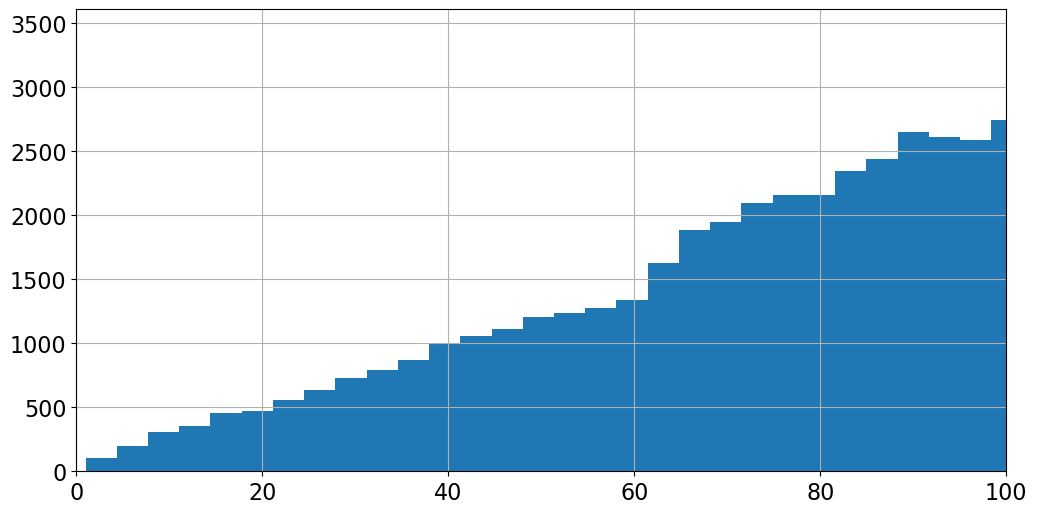

In [51]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 6))
plt.grid()
plt.xlim(0, 100)

plt.hist(d * 3600, bins=4000);

In [48]:
kd_tree = KDTree(train_20[['RA', 'DEC']].values)
d, idx = kd_tree.query(superset_02[['RA', 'DEC']].values)

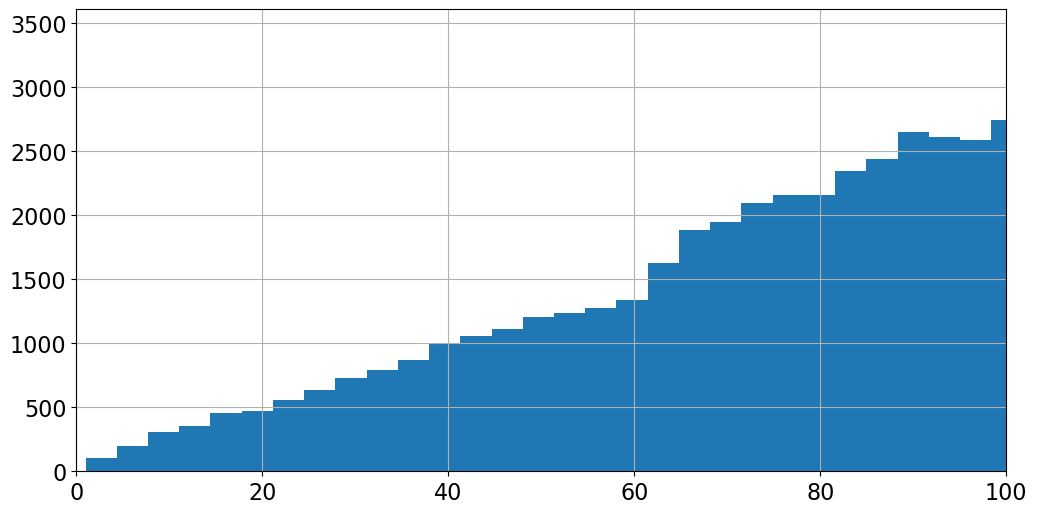

In [50]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 6))
plt.grid()
plt.xlim(0, 100)

plt.hist(d * 3600, bins=4000);

In [69]:
train_20_01.to_csv(f'{data_dir}/proc_train_20.csv', index=False)
DR16Q_22_v4_01.to_csv(f'{data_dir}/proc_DR16Q.csv', index=False)
superset_02.to_csv(f'{data_dir}/proc_superset.csv', index=False)

In [17]:
t = Table.read(f'{data_dir}/dr16q_prop_Sep08_2022.fits')
print(t.colnames)
dr16q_prop = t['SDSS_NAME', 'RA', 'DEC', 'Z_DR16Q', 'Z_SYS', 'Z_SYS_ERR'].to_pandas()
dr16q_prop['diff'] = np.abs(dr16q_prop['Z_DR16Q'] - dr16q_prop['Z_SYS'])
dr16q_prop.sort_values(by=['diff'], inplace=True, ascending=False)
dr16q_prop.reset_index(drop=True, inplace=True)
dr16q_prop

['SDSS_NAME', 'PLATE', 'MJD', 'FIBERID', 'RA', 'DEC', 'OBJID', 'IF_BOSS_SDSS', 'Z_DR16Q', 'SOURCE_Z_DR16Q', 'Z_FIT', 'Z_SYS', 'Z_SYS_ERR', 'EBV', 'SN_MEDIAN_ALL', 'CONTI_FIT', 'CONTI_FIT_ERR', 'CONTI_STAT', 'FEII_UV', 'FEII_UV_ERR', 'FEII_UV_EW', 'FEII_UV_EW_ERR', 'FEII_OPT', 'FEII_OPT_ERR', 'FEII_OPT_EW', 'FEII_OPT_EW_ERR', 'LOGL1350', 'LOGL1350_ERR', 'LOGL1700', 'LOGL1700_ERR', 'LOGL3000', 'LOGL3000_ERR', 'LOGL5100', 'LOGL5100_ERR', 'HALPHA', 'HALPHA_BR', 'NII6585', 'SII6718', 'HBETA', 'HBETA_BR', 'HEII4687', 'HEII4687_BR', 'OIII5007', 'OIII5007C', 'CAII3934', 'OII3728', 'NEV3426', 'MGII', 'MGII_BR', 'CIII_ALL', 'CIII_BR', 'SIIII1892', 'ALIII1857', 'NIII1750', 'CIV', 'HEII1640', 'HEII1640_BR', 'SIIV_OIV', 'OI1304', 'LYA', 'NV1240', 'HALPHA_ERR', 'HALPHA_BR_ERR', 'NII6585_ERR', 'SII6718_ERR', 'HBETA_ERR', 'HBETA_BR_ERR', 'HEII4687_ERR', 'HEII4687_BR_ERR', 'OIII5007_ERR', 'OIII5007C_ERR', 'CAII3934_ERR', 'OII3728_ERR', 'NEV3426_ERR', 'MGII_ERR', 'MGII_BR_ERR', 'CIII_ALL_ERR', 'CIII_BR_

,SDSS_NAME,RA,DEC,Z_DR16Q,Z_SYS,Z_SYS_ERR,diff
0,b'171035.37+345020.9',257.647398,34.839165,4.657419,-999.000000,-2.000000,1003.657419
1,b'103100.55+202832.1',157.752301,20.475607,4.385547,-999.000000,-2.000000,1003.385547
2,b'121147.84+324546.4',182.949352,32.762898,4.085342,-999.000000,-2.000000,1003.085342
3,b'132428.66+571640.9',201.119434,57.278030,-999.000000,1.077868,0.010941,1000.077868
4,b'163651.46+262656.8',249.214456,26.449127,-999.000000,0.800000,-1.000000,999.800000
...,...,...,...,...,...,...,...
750409,b'020235.30+022957.2',30.647124,2.499247,1.164973,1.164973,-1.000000,0.000000
750410,b'212627.87+003715.8',321.616161,0.621068,1.329421,1.329421,-1.000000,0.000000
750411,b'022936.15-002939.1',37.400637,-0.494204,2.624000,2.624000,-1.000000,0.000000
750412,b'155306.44+444807.0',238.276858,44.801945,2.175000,2.175000,-1.000000,0.000000


In [15]:
t = dr16q_prop.iloc[7: 1900]
t = t[t['Z_DR16Q'] >= 3]
t.to_csv(f'{data_dir}/dr16q_prop_temp.csv', index=False)
t

,SDSS_NAME,RA,DEC,Z_DR16Q,Z_SYS,diff
7,b'171527.30+385200.6',258.863753,38.866850,7.011245,0.260534,6.750711
8,b'005439.36+095236.1',13.664019,9.876710,6.785653,0.115686,6.669967
9,b'221449.39+011525.4',333.705799,1.257066,7.001978,0.491197,6.510782
10,b'025941.56-052230.6',44.923198,-5.375171,7.002700,0.495294,6.507406
11,b'230519.91+330347.9',346.332993,33.063309,6.923885,0.459663,6.464222
...,...,...,...,...,...,...
1340,b'023306.90-031211.7',38.278783,-3.203255,3.100000,2.328727,0.771273
1622,b'163142.98+135511.5',247.929113,13.919876,3.140000,2.549107,0.590893
1696,b'104526.28+365919.4',161.359512,36.988725,3.145000,2.622150,0.522850
1756,b'082957.59+463634.4',127.489987,46.609564,3.782000,3.294875,0.487125


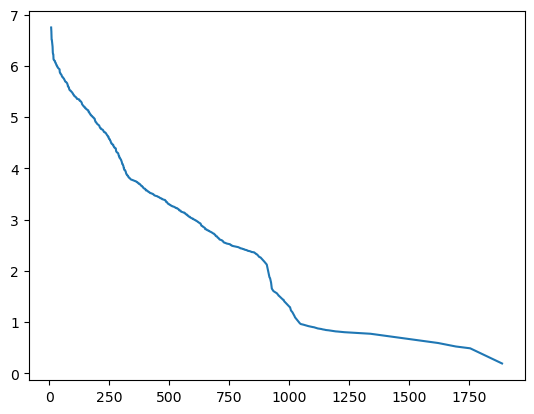

In [16]:
plt.plot(t['diff'])

In [20]:
dr16q = pd.read_csv(f'{data_dir}/proc_DR16Q.csv')
dr16q

,RA,DEC,Z,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,sdssdr16_i_cmodel,...,decals8tr_z,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE
0,342.271924,9.512226,-0.000801,23.293404,23.261944,21.289465,20.298392,19.764126,23.072889,19.499491,...,19.015930,1.733186,3.337994,1.604808,0.252153,0.084967,-0.177832,0.604661,0.880353,DR16Q_22_v4
1,204.568544,37.277746,0.000957,21.743158,21.655871,21.408858,21.415014,21.439662,21.521578,21.439872,...,21.922094,0.372104,-0.107486,-0.479590,-0.150381,-0.027585,-1.098537,1.290210,0.404038,DR16Q_22_v4
2,21.348922,16.562467,0.006583,21.433277,21.631844,21.359531,21.324999,20.555731,21.343403,21.354694,...,21.236205,0.283104,0.610671,0.327567,-0.222328,-0.233954,-0.598360,0.944000,0.551885,DR16Q_22_v4
3,191.619513,49.916623,0.008189,20.926910,20.820363,20.758047,20.796802,20.607651,20.917666,20.790658,...,20.747587,0.091031,0.135798,0.044767,-0.105558,-0.067531,-0.592861,2.060140,0.699425,DR16Q_22_v4
4,251.495340,46.344458,0.008549,22.239800,22.200534,21.866438,21.925578,21.336407,22.265156,21.747651,...,22.472822,0.876169,1.309582,0.433412,-1.597481,-1.047978,-1.146156,1.349261,0.459766,DR16Q_22_v4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260365,139.060275,31.044950,7.011245,21.482335,21.251735,20.825714,20.804427,20.632446,21.428634,20.827816,...,21.077322,0.389810,0.820260,0.430450,-0.645543,-0.776375,-1.012587,1.015129,0.237470,DR16Q_22_v4
260366,341.770887,27.894757,7.011245,21.674032,21.488355,21.111815,20.888735,20.622064,21.690081,20.917052,...,21.006203,0.499767,0.544949,0.045182,-0.163817,-0.017016,-0.332926,1.451578,0.759455,DR16Q_22_v4
260367,23.595403,16.256553,7.011245,21.688753,21.627957,20.911338,21.081224,20.538696,21.483258,21.040642,...,20.855774,0.650219,1.239918,0.589699,-0.528695,-0.567993,-0.993836,1.161900,0.704290,DR16Q_22_v4
260368,359.586721,30.006652,7.012407,21.976982,21.611828,21.483509,21.384855,21.397169,21.739690,21.393072,...,21.461349,0.136482,0.245344,0.108862,-0.088343,-0.073072,-0.560012,0.916000,0.264474,DR16Q_22_v4


In [21]:
kd_tree = KDTree(dr16q_prop[['RA', 'DEC']].values[7: 1900])
d, idx = kd_tree.query(dr16q[['RA', 'DEC']].values)

In [22]:
m = (d <= 0.0000001)

In [23]:
m.sum()

1362

In [24]:
proc_prop_DR16Q = dr16q[m]

In [25]:
dr16q_prop.loc[7: 1900].iloc[idx[m]]['Z_SYS']

960     1.488991
1022    1.123435
950     1.560199
1041    0.990284
992     1.377521
          ...   
41      1.070473
70      1.327632
46      1.153905
34      1.040394
29      0.997404
Name: Z_SYS, Length: 1362, dtype: float64

In [29]:
proc_prop_DR16Q['Z_SYS'] = dr16q_prop.loc[7: 1900].iloc[idx[m]]['Z_SYS'].values
proc_prop_DR16Q['Z_SYS_ERR'] = dr16q_prop.loc[7: 1900].iloc[idx[m]]['Z_SYS_ERR'].values

/tmp/ipykernel_1340962/2244428796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proc_prop_DR16Q['Z_SYS'] = dr16q_prop.loc[7: 1900].iloc[idx[m]]['Z_SYS'].values
/tmp/ipykernel_1340962/2244428796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proc_prop_DR16Q['Z_SYS_ERR'] = dr16q_prop.loc[7: 1900].iloc[idx[m]]['Z_SYS_ERR'].values


In [30]:
proc_prop_DR16Q

,RA,DEC,Z,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,sdssdr16_i_cmodel,...,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE,Z_SYS,Z_SYS_ERR
0,342.271924,9.512226,-0.000801,23.293404,23.261944,21.289465,20.298392,19.764126,23.072889,19.499491,...,3.337994,1.604808,0.252153,0.084967,-0.177832,0.604661,0.880353,DR16Q_22_v4,1.488991,0.005181
2,21.348922,16.562467,0.006583,21.433277,21.631844,21.359531,21.324999,20.555731,21.343403,21.354694,...,0.610671,0.327567,-0.222328,-0.233954,-0.598360,0.944000,0.551885,DR16Q_22_v4,1.123435,0.003304
3,191.619513,49.916623,0.008189,20.926910,20.820363,20.758047,20.796802,20.607651,20.917666,20.790658,...,0.135798,0.044767,-0.105558,-0.067531,-0.592861,2.060140,0.699425,DR16Q_22_v4,1.560199,0.002642
5,350.520778,30.096626,0.010326,22.146360,21.874411,21.528691,21.549982,21.002606,21.717629,21.443131,...,0.599295,0.233754,0.071374,0.149797,-0.492938,1.017882,0.687900,DR16Q_22_v4,0.990284,0.001618
6,256.791721,45.663833,0.015376,21.763909,22.019808,21.921908,21.779540,22.496530,21.305643,21.725624,...,1.677500,1.140050,-1.877405,-1.492849,-1.330181,1.934525,0.162386,DR16Q_22_v4,1.377521,0.002196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260365,139.060275,31.044950,7.011245,21.482335,21.251735,20.825714,20.804427,20.632446,21.428634,20.827816,...,0.820260,0.430450,-0.645543,-0.776375,-1.012587,1.015129,0.237470,DR16Q_22_v4,1.070473,0.001550
260366,341.770887,27.894757,7.011245,21.674032,21.488355,21.111815,20.888735,20.622064,21.690081,20.917052,...,0.544949,0.045182,-0.163817,-0.017016,-0.332926,1.451578,0.759455,DR16Q_22_v4,1.327632,0.002149
260367,23.595403,16.256553,7.011245,21.688753,21.627957,20.911338,21.081224,20.538696,21.483258,21.040642,...,1.239918,0.589699,-0.528695,-0.567993,-0.993836,1.161900,0.704290,DR16Q_22_v4,1.153905,0.001124
260368,359.586721,30.006652,7.012407,21.976982,21.611828,21.483509,21.384855,21.397169,21.739690,21.393072,...,0.245344,0.108862,-0.088343,-0.073072,-0.560012,0.916000,0.264474,DR16Q_22_v4,1.040394,0.000788


In [31]:
proc_prop_DR16Q.to_csv(f'{data_dir}/proc_prop_DR16Q.csv', index=False)